# GLOBAL PLASTICS WASTE MANAGEMENT

This project is on the topic global plastic waste dataset. This consist of 2 different csv files 

* per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv
* per-capita-plastic-waste-vs-gdp-per-capita.csv

### Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [3]:
# Checking the number of null/missing values in the dataset
df.isna().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [4]:
df.shape

(48168, 7)

In [5]:
# Lets see the number of missing attributes as percentage 
columns = list(df.columns)
for cols in columns:
    print(f"Missing values in {cols} is {np.round(((df[cols].isnull().sum())/len(df))*100,2)}%")

Missing values in Entity is 0.0%
Missing values in Code is 4.18%
Missing values in Year is 0.0%
Missing values in Per capita plastic waste (kg/person/day) is 99.61%
Missing values in GDP per capita, PPP (constant 2011 international $) is 86.7%
Missing values in Total population (Gapminder, HYDE & UN) is 2.67%
Missing values in Continent is 99.41%


In [6]:
# Lets see about the attributes and its data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
# Renaming the columns 
df.rename(columns = {"Per capita plastic waste (kg/person/day)":"waste per person(kg/person/day)",
                    "Total population (Gapminder, HYDE & UN)": "Total Population",
                    "GDP per capita, PPP (constant 2011 international $)":"GDP per capita in PPP"}, inplace = True)
df

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [8]:
# removing data points having missing/incomplete values
indx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(indx,inplace = True)
df

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
...,...,...,...,...,...,...,...
48162,Zimbabwe,ZWE,1987,NaN,NaN,9527000.0,NaN
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN


In [9]:
df.head()

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


The dataset is found to follow alphabetical order therefore we can try and fill the missing values in the "Continent" column.
This is done through taking out rows and forming a 2010 DataFrame with values from Year==2010.The values in column "Continent" can be used to fill the rest of the dataset as those values wont change 

In [10]:
# retrieving rows in which year == 2010
df_2010 = df[df['Year']==2010]
df_2010 = df_2010.drop(columns = 'Continent')

In [11]:
df_2010.head()

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


Here we took values from 2015 and filled it in 2010 thus reducing the missing value count. This is a way of **Handling missing values** in a dataset. In the begining the "Continent" was found to have more than 80% missing values now insted of droping thw whole column we would only drop certain rows thus retaining the column and the information 

In [12]:
# retriveing continent in which year = 2015
df_2015 = df[df['Year']==2015]
df_2010['Continent'] = df_2015['Continent'].values

In [13]:
df_2010.head()

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,Asia
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,Europe
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,Africa
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,Oceania


In [14]:
df_2010.shape

(287, 7)

In [15]:
# Drop all the rows with missing Continent Values 
missing_indx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_indx, inplace=True)

In [16]:
df_2010.shape

(235, 7)

In [17]:
#droping rows with missing values in per person waste generation 
df_2010 = df_2010[df_2010['waste per person(kg/person/day)'].notna()]
df_2010 = df_2010.reset_index().drop('index', axis = 1)

In [18]:
df_2010

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America
...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,17082.404659,3359000.0,South America
177,Vanuatu,VUT,2010,0.295,2948.032937,236000.0,Oceania
178,Venezuela,VEN,2010,0.252,16544.972055,28440000.0,South America
179,Vietnam,VNM,2010,0.103,4408.168612,87968000.0,Asia


In [19]:
# Reading the second csv file 
df2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [20]:
# Renaming columns 
df2.rename(columns = {"GDP per capita, PPP (constant 2011 international $)":"GDP per capita in PPP",
                     "Total population (Gapminder, HYDE & UN)":"Total Population"}, inplace = True)

In [21]:
df2

,Entity,Code,Year,Per capita mismanaged plastic waste,GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [22]:
# Dropping the column Continent 
df2.drop("Continent", axis = 1, inplace=True)


In [23]:
# Retrieving the rows in which year == 2010
df2_2010 = df2[df2["Year"]==2010]
df2_2010

,Entity,Code,Year,Per capita mismanaged plastic waste,GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04
...,...,...,...,...,...,...
47341,Western Sahara,ESH,2010,NaN,NaN,4.800000e+05
47371,World,OWID_WRL,2010,NaN,13175.933989,6.956824e+09
47503,Yemen,YEM,2010,0.077,4478.743599,2.315500e+07
47746,Zambia,ZMB,2010,NaN,3279.277161,1.360600e+07


In [24]:
# dropping rows with Mismanaged waste per person(kg/day)
import warnings
warnings.filterwarnings('ignore')
missing_idx = df2_2010[df2_2010['Per capita mismanaged plastic waste'].isna()].index
df2_2010.drop(missing_idx,inplace=True)

In [25]:
df2_2010.shape

(186, 6)

In [26]:
df2_2010.reset_index().drop("index", axis = 1)

,Entity,Code,Year,Per capita mismanaged plastic waste,GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0
...,...,...,...,...,...,...
181,Uruguay,URY,2010,0.024,17082.404659,3359000.0
182,Vanuatu,VUT,2010,0.245,2948.032937,236000.0
183,Venezuela,VEN,2010,0.017,16544.972055,28440000.0
184,Vietnam,VNM,2010,0.090,4408.168612,87968000.0


In [27]:
# Merging both DataFrame 
df_plastic_waste = pd.merge(df_2010,df2_2010, how = 'inner')

In [28]:
df_plastic_waste

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent,Per capita mismanaged plastic waste
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051
...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,17082.404659,3359000.0,South America,0.024
177,Vanuatu,VUT,2010,0.295,2948.032937,236000.0,Oceania,0.245
178,Venezuela,VEN,2010,0.252,16544.972055,28440000.0,South America,0.017
179,Vietnam,VNM,2010,0.103,4408.168612,87968000.0,Asia,0.090


In [29]:
df_plastic_waste.iloc[:,3:5] = np.around(df_plastic_waste[['waste per person(kg/person/day)',
                                                         'GDP per capita in PPP']],decimals = 2)

In [30]:
df_plastic_waste

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent,Per capita mismanaged plastic waste
0,Albania,ALB,2010,0.07,9927.18,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.14,12870.60,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.06,5897.68,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.25,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.66,19212.72,88000.0,North America,0.051
...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.25,17082.40,3359000.0,South America,0.024
177,Vanuatu,VUT,2010,0.30,2948.03,236000.0,Oceania,0.245
178,Venezuela,VEN,2010,0.25,16544.97,28440000.0,South America,0.017
179,Vietnam,VNM,2010,0.10,4408.17,87968000.0,Asia,0.090


Since we have both **waste per person(kg/person/day)** and **Per capita mismanaged plastic waste** we can generate new columns/ attributes by multipying them with 365 in-order to get data for a year, Thus we are creating 2 new attributes from existing attributes 

In [31]:
df_plastic_waste["Total waste per year"] = df_plastic_waste["waste per person(kg/person/day)"]*365
df_plastic_waste["Total mismanaged waste per year"] = df_plastic_waste['Per capita mismanaged plastic waste']*365


In [32]:
df_plastic_waste

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent,Per capita mismanaged plastic waste,Total waste per year,Total mismanaged waste per year
0,Albania,ALB,2010,0.07,9927.18,2948000.0,Europe,0.032,25.55,11.680
1,Algeria,DZA,2010,0.14,12870.60,35977000.0,Africa,0.086,51.10,31.390
2,Angola,AGO,2010,0.06,5897.68,23356000.0,Africa,0.045,21.90,16.425
3,Anguilla,AIA,2010,0.25,NaN,13000.0,North America,0.010,91.25,3.650
4,Antigua and Barbuda,ATG,2010,0.66,19212.72,88000.0,North America,0.051,240.90,18.615
...,...,...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.25,17082.40,3359000.0,South America,0.024,91.25,8.760
177,Vanuatu,VUT,2010,0.30,2948.03,236000.0,Oceania,0.245,109.50,89.425
178,Venezuela,VEN,2010,0.25,16544.97,28440000.0,South America,0.017,91.25,6.205
179,Vietnam,VNM,2010,0.10,4408.17,87968000.0,Asia,0.090,36.50,32.850


Now lets see if there exist a relationship among the variables , for example lets analyse is the **GDP per capita in PPP** has any effect on **Per capita mismanaged plastic waste**

<AxesSubplot:title={'center':'Mismanaged Waste VS GDP per capita'}, xlabel='GDP per capita in PPP', ylabel='Per capita mismanaged plastic waste'>

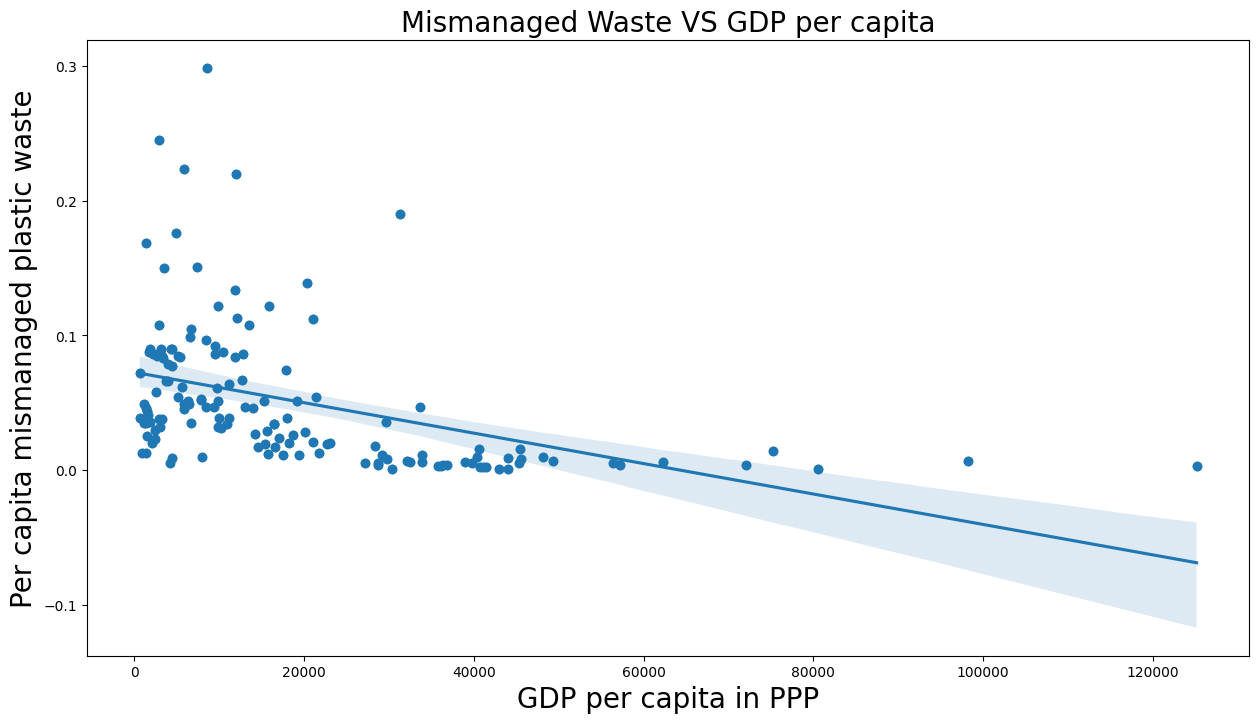

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'],df_plastic_waste['Per capita mismanaged plastic waste'])
plt.title("Mismanaged Waste VS GDP per capita",fontsize=20)
plt.xlabel("GDP per capita in PPP",fontsize=20)
plt.ylabel("Per capita mismanaged plastic waste",fontsize=20)
sns.regplot(x = "GDP per capita in PPP",
           y = "Per capita mismanaged plastic waste",
           data = df_plastic_waste)

It is evident that the mismanagent of plastic is found to be high in developing countries(low GDP per capita) than countires with high GDP per capita. Although there exis not much linear relationship among the variable we can infer other relationships like one stated above 

<AxesSubplot:title={'center':'Waste generated VS GDP per capita'}, xlabel='GDP per capita in PPP', ylabel='Total waste per year'>

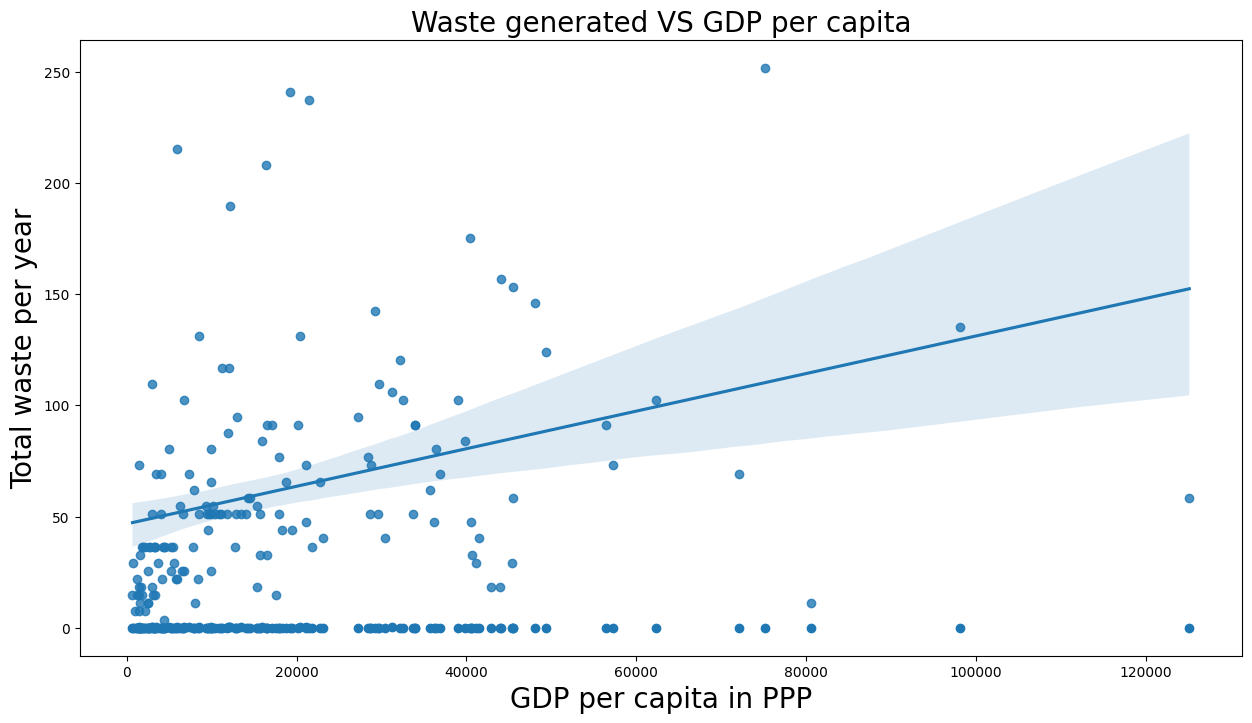

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'],df_plastic_waste['Per capita mismanaged plastic waste'])
plt.title("Waste generated VS GDP per capita",fontsize=20)
plt.xlabel("GDP per capita in PPP",fontsize=20)
plt.ylabel("Total waste per year",fontsize=20)
sns.regplot(x="GDP per capita in PPP",
           y="Total waste per year",data=df_plastic_waste)

So here as we can see countries with large GDP per capita generate more waste with few execptions which we call **outliers** mostly as GDP per capita increase waste generated increase. Lets see the same with **population vs waste** for this we may have to rescale the total population column

In [35]:
# Dividing by 1 million 
df_plastic_waste["Total Population"] = df_plastic_waste["Total Population"]/1000000
df_plastic_waste

,Entity,Code,Year,waste per person(kg/person/day),GDP per capita in PPP,Total Population,Continent,Per capita mismanaged plastic waste,Total waste per year,Total mismanaged waste per year
0,Albania,ALB,2010,0.07,9927.18,2.948,Europe,0.032,25.55,11.680
1,Algeria,DZA,2010,0.14,12870.60,35.977,Africa,0.086,51.10,31.390
2,Angola,AGO,2010,0.06,5897.68,23.356,Africa,0.045,21.90,16.425
3,Anguilla,AIA,2010,0.25,NaN,0.013,North America,0.010,91.25,3.650
4,Antigua and Barbuda,ATG,2010,0.66,19212.72,0.088,North America,0.051,240.90,18.615
...,...,...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.25,17082.40,3.359,South America,0.024,91.25,8.760
177,Vanuatu,VUT,2010,0.30,2948.03,0.236,Oceania,0.245,109.50,89.425
178,Venezuela,VEN,2010,0.25,16544.97,28.440,South America,0.017,91.25,6.205
179,Vietnam,VNM,2010,0.10,4408.17,87.968,Asia,0.090,36.50,32.850


<AxesSubplot:title={'center':'Waste generated VS Total Population'}, xlabel='Total Population', ylabel='Total waste per year'>

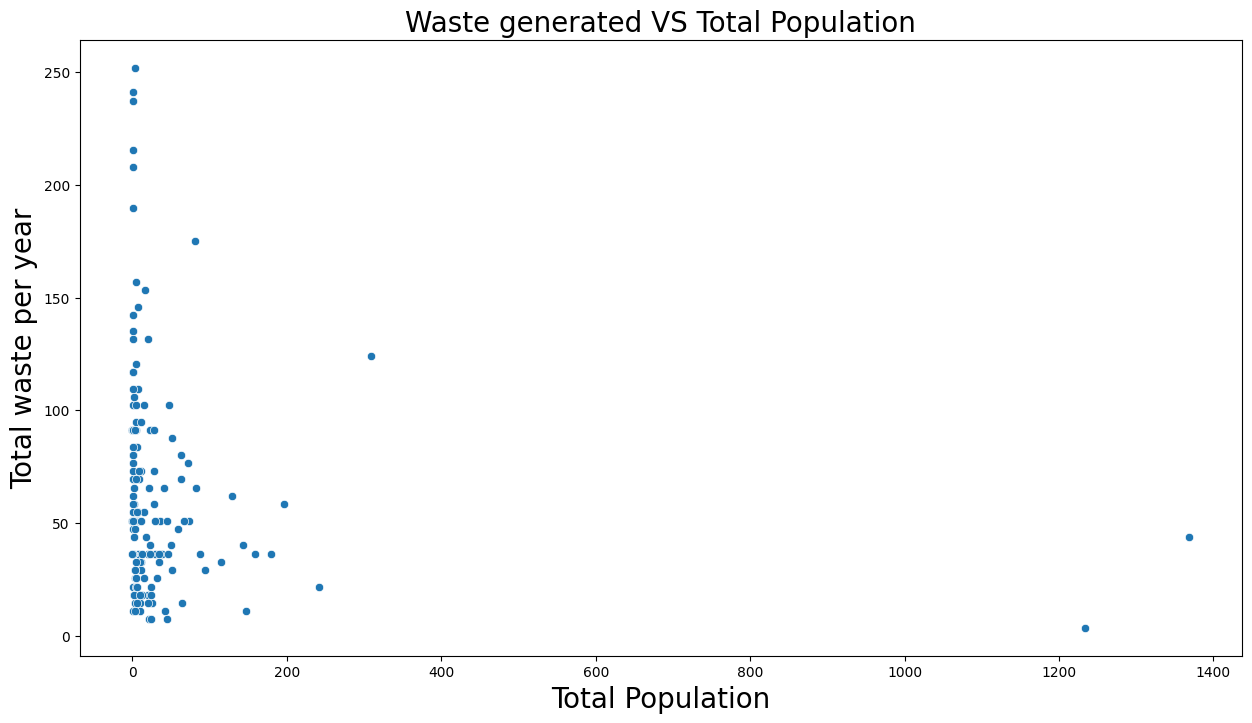

In [41]:
plt.figure(figsize=(15,8))
plt.title("Waste generated VS Total Population",fontsize=20)
plt.xlabel("Total Population",fontsize=20)
plt.ylabel("Total waste per year",fontsize=20)
sns.scatterplot(x="Total Population",y="Total waste per year", data=df_plastic_waste)